In [5]:
#given the Laplacian matrix L, compute the normalised version
def normalised_genlap(L):
    D = np.diagonal(L)                # extract the diagonal elements which correspond to the degree
    D = [pow(d,-0.5) for d in D]      # compute d^(-1/2) for each of the degrees
    D_hf = np.diag(D)                 # form a square matrix D^(-1/2)
    Df = np.matmul(D_hf, L)           # compute D^(-1/2) L
    Ln = np.matmul(Df,D_hf)           # compute D^(-1/2) L D^(-1/2)
    return Ln                         # return normalised Laplacian

In [6]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*s)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [7]:
#function to compute the laplace based Laplacian matrix for a given value of lambda

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
#heatcontent against time for the normal and mellin based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools
from scipy.linalg import expm

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Normal']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for s in lists:
    Ln = normalised_genlap(kplaplacian_mlf(G,s))        #compute the normalised generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$s=$'+str(s))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1))

plt.show()

NameError: name 'expm' is not defined

In [ ]:
#heatcontent against time for the normal and laplace based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools
from scipy.linalg import expm

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Normal']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for lam in lists:
    Ln = normalised_genlap(kplaplacian_ltf(G,lam))        #compute the normalised generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$\lambda=$'+str(lam))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1))

plt.show()

2.0


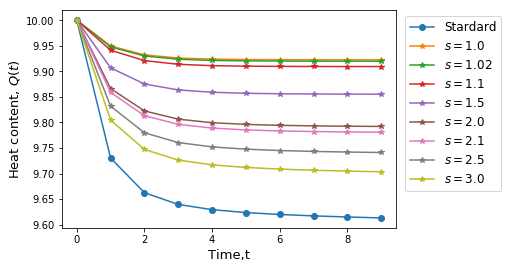

In [23]:
#heatcontent against time for the normal and mellin based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools
from scipy.linalg import expm

n=10
p=0.25
G = nx.gnp_random_graph(n, p, seed=None, directed=False)
while (nx.is_connected(G)==False):
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)

deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])
print(avedegree)

list_norm_genlap = []

time = range(10)


listexpA = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Stardard']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for s in lists:
    Ln = normalised_genlap(kplaplacian_mlf(G,s))        #compute the normalised generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$s=$'+str(s))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.xlabel('Time,t', fontsize=13)
plt.ylabel('Heat content, $Q(t)$', fontsize=13)
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.17,1),prop={'size': 12})
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-Mellinheatcontent.eps', format='eps', bbox_inches='tight')
plt.show()

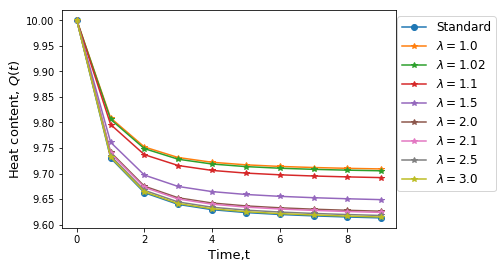

In [24]:
list_norm_genlap = []

time = range(10)

listexpA = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Standard']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for lam in lists:
    Ln = normalised_genlap(kplaplacian_ltf(G,lam))        #compute the normalised generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$\lambda=$'+str(lam))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")

plt.xlabel('Time,t', fontsize=13)
plt.ylabel('Heat content, $Q(t)$', fontsize=13) 
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1), prop={'size': 12})
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-Laplaceheatcontent.eps', format='eps',bbox_inches='tight')
plt.show()

In [ ]:
#heatcontent against time for the normal and laplace based generalised normalised laplacian

import networkx as nx
import pylab as plt
import itertools

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
L = nx.laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
list_norm_genlap.append(listexpA)
leg = ['Normal']                                      #set first element of the legend

lists = [1.00,1.02,1.10,1.50,2.00,2.10,2.50,3.00]

for lam in lists:
    Ln = kplaplacian_ltf(G,lam)                      #compute the generalised Laplacian with s=2
    An=Ln
    #A.sum()
    listexpA = []
    for t in time:
        expAn = expm(-t*An)
        listexpA.append(expAn.sum())
    list_norm_genlap.append(listexpA)
    leg.append('$s=$'+str(lam))

    
for i in range(0,len(list_norm_genlap)):
    if i==0:
        plt.plot(time,list_norm_genlap[i],"o-")
    else:
        plt.plot(time,list_norm_genlap[i],"*-")
        
plt.legend(leg,loc='upper center', bbox_to_anchor=(1.15,1))
plt.show()

In [ ]:
import networkx as nx
import pylab as plt
import itertools

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])
list_norm_genlap = []
time = range(10)


listexpA = []
listtrace = []
L = nx.normalized_laplacian_matrix(G)
A=L.todense()
for t in time:
    expA = expm(-t*A)
    listexpA.append(expA.sum())
    listtrace.append(np.sum(np.diagonal(expA)))
    
plt.plot(time,listexpA,"o-")  
plt.plot(time,listtrace,"*-") 
plt.show()

In [ ]:
import numpy as np
import pylab as plt

t = [0,1,2,3]
tt = [i * 1 for i in t]
y = np.exp(tt) 
yy1 = [j * 2 for j in y]
yy2 = [j * 3 for j in y]
plt.plot(t,yy1, label="yy1") 
plt.plot(t,yy2)
plt.legend()
plt.show()
print(t)

In [ ]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

n=100
m=[4,5,7,10,12]
phi_lst = []
phi_av = []
lg = []
time = np.arange(0,5,0.05)
for i in range(5):
    G = nx.barabasi_albert_graph(n, m[i], seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m, seed=None)

    phi_av.append(nx.average_shortest_path_length(G))
    

    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions

    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix

    phi_t = []
    for t in time :                             #Loop through times and decay each initial component
        #D = np.diag(np.exp(np.multiply(D,-t)));
        H = expm(np.multiply(L,-t))
        phi_t.append(H.sum())
        
    phi_lst.append(phi_t)
    lg.append('Ave'+str(m[i]))
        
for i in range(5):
        plt.plot(time,[ e/max(phi_lst[i]) for e in phi_lst[i]])

plt.legend(lg,loc='upper center', bbox_to_anchor=(1.15,1))
plt.show()
print(phi_av)

In [11]:
G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.degree[0]  # node 0 has degree 1

deg = list(G.degree([0, 1, 2]))

In [17]:
deg

[(0, 1), (1, 2), (2, 2)]

In [19]:
s = 0

np.mean([d[1] for d in deg])

1.6666666666666667